# Project 1
#### Problem Statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

## Introduction
I've decided to look at the Stack Overflow annual survey for 2023 results of which are available here https://survey.stackoverflow.co/2023/.

Stack Overflow is a question and answer forum where programmers discuss technical issues(Barua, Thomas and Hassan, 2014). The Stack Overflow annual survey is filled by developers from around the world and asks questions like which programming languages developers are interested in, which databases they have used and their work situations(Beeharry and Ganoo, 2018). In this notebook I will research and synthesise data for the following questions:
1.	MainBranch – this relates to the professional level of the survey respondent.
2.	RemoteWork – does the respondent work remotely or in-person or a mixture of both.
3.	EdLevel – level of education achieved by the respondent.
4.	YearsCode – coding experience of the respondent.
5.	LanguageHaveWorkedWith – programming languages used by the respondent, I will focus on python.
6.	LanguageWantToWorkWith – programming the respondent wants to work with, again I will focus on python.

I will use the following Python tools to investigate, manipulate and synthesise the data, numpy, Pandas, matplotlib, Random, Regex and I will also use Zipfile, io and urlopen to download the dataset.

I will analyse the data, then create test data which will have the same number of entries as the original data so they can be compared. I will then create the final synthesized data which will have 10,000 entries using the same method as used for the test data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import io
from urllib.request import urlopen
import re
import random

Download Stack Overflow Annual survey 2023

In [2]:
r = urlopen('https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip').read()
file = ZipFile(io.BytesIO(r))
survey_df = pd.read_csv(file.open('survey_results_public.csv'))

##### Set up new DataFrame

create a new DataFrame with only the columns of interest https://www.statology.org/pandas-create-dataframe-from-existing-dataframe/

In [3]:
new_df = survey_df[['MainBranch', 'Age', 'RemoteWork', 'EdLevel', 'YearsCode', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].copy()

I am interested in only developers likely to be in the job market, so 25 to 64 year olds will be close enough. I will remove the other age groups. https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/

In [4]:
new_df.drop(new_df.loc[new_df['Age']=='18-24 years old'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='Under 18 years old'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='65 years or older'].index, inplace=True)
new_df.drop(new_df.loc[new_df['Age']=='Prefer not to say'].index, inplace=True)

I'm interested in python when it comes to languages so we'll create a column highlighting those who used Python in the past year
https://stackoverflow.com/questions/58360915/regex-expression-to-replace-a-string-containing-a-substring-with-the-substring-o

https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe

In [5]:

new_df["worked_with_python"] = new_df["LanguageHaveWorkedWith"]
# Next replace Python with y
new_df["worked_with_python"] = np.where(new_df["worked_with_python"].str.contains('Python'), 'Y',new_df["worked_with_python"])
# Remove all the other languages i.e. replace them with ''
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
new_df["worked_with_python"] = new_df["worked_with_python"].str.replace(regular_expression, '', regex=True)
# Finally add an N to all the empty rows
new_df["worked_with_python"] = new_df["worked_with_python"].replace(r'^\s*$', 'N', regex=True)


Let's do the same for those who want to work with python in the future

In [6]:
new_df["want_to_python"] = new_df["LanguageWantToWorkWith"]
new_df["want_to_python"] = np.where(new_df["want_to_python"].str.contains('Python'), 'Y',new_df["want_to_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
new_df["want_to_python"] = new_df["want_to_python"].str.replace(regular_expression, '', regex=True)
new_df["want_to_python"] = new_df["want_to_python"].replace(r'^\s*$', 'N', regex=True)

let's drop the old language columns

In [7]:
new_df = new_df.drop(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'], axis = 1 )

##### Python columns

Examine and synthesise data for the Worked With Python and Want To Work With Python columns


count Ns and Ys https://stackoverflow.com/questions/22391433/count-the-frequency-that-a-value-occurs-in-a-dataframe-column

In [8]:
worked_with_count = new_df['worked_with_python'].value_counts()

create a list with 0s and 1s representing Ns and Ys https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html
In this code 0.4545 is the probability of success and gives us a weighting towards 0

In [9]:
bn_list = np.random.binomial(1, 0.4544, size = 65505)

Create a new DataFrame and add the synthesised data to it.

In [10]:
test_df = pd.DataFrame({'test': bn_list})

count 0s and 1s

In [11]:
synt_count =test_df['test'].value_counts()

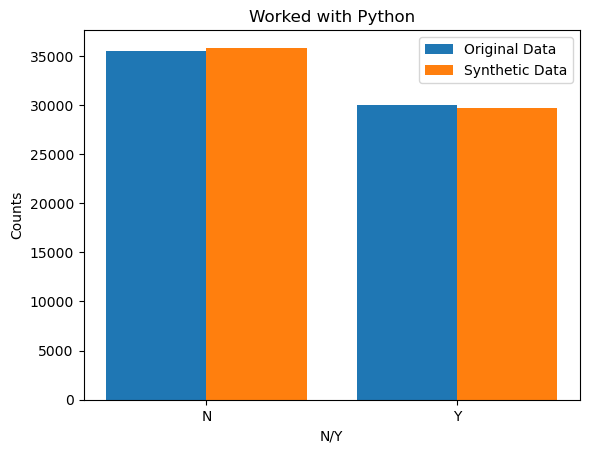

In [12]:
X = ['N','Y'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, worked_with_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('N/Y') 
plt.ylabel('Counts') 
plt.title('Worked with Python') 
plt.legend() 
plt.show() 

Repeat the above steps for 'want_to_python'

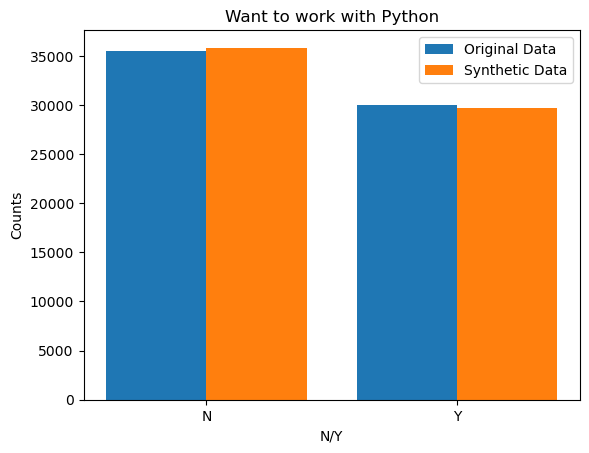

In [13]:
want_to_count = new_df['want_to_python'].value_counts()
bn_list_wt = np.random.binomial(1, 0.457, size = 65505)
test_df['test1'] = pd.Series(bn_list_wt)
synt_count_wt = test_df['test1'].value_counts()

X = ['N','Y'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, worked_with_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('N/Y') 
plt.ylabel('Counts') 
plt.title('Want to work with Python') 
plt.legend() 
plt.show() 

Create a DataFrame for the synthesised data with both Python Columns containing 10,000 entries and 1s and 0s converted back to Ys and Ns

In [14]:
synt_list_ww = np.random.binomial(1, 0.4544, size = 10000)
synt_list_wt = np.random.binomial(1, 0.457, size = 10000)
synt_df = pd.DataFrame({'worked_with_python': synt_list_ww})
synt_df['want_to_python'] = pd.Series(synt_list_wt)

synt_df['worked_with_python'] = synt_df['worked_with_python'].apply(str)
synt_df['want_to_python'] = synt_df['want_to_python'].apply(str)

synt_df['worked_with_python'] = np.where(synt_df['worked_with_python'].str.contains('1'), 'Y',synt_df['worked_with_python'])
synt_df['worked_with_python'] = np.where(synt_df['worked_with_python'].str.contains('0'), 'N',synt_df['worked_with_python'])
synt_df['want_to_python'] = np.where(synt_df['want_to_python'].str.contains('1'), 'Y',synt_df['want_to_python'])
synt_df['want_to_python'] = np.where(synt_df['want_to_python'].str.contains('0'), 'N',synt_df['want_to_python'])

##### Years Coding Column
Examine and synthesise data for the Years Coding column

Replace NA, Less than 1 year and More than 50 years with -1.0, 0.0 and 51.0 so we can convert all the entries to to numeric values to make counting and synthesis easier.

In [15]:
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('NA'), '-1.0', new_df["YearsCode"])
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('Less than 1 year'), '0.0', new_df["YearsCode"])
new_df["YearsCode"] = np.where(new_df["YearsCode"].str.contains('More than 50 years'), '51.0', new_df["YearsCode"])
new_df["YearsCode"] = pd.to_numeric(new_df["YearsCode"], errors='coerce')
year_count = new_df["YearsCode"].value_counts()
years_count = new_df["YearsCode"].value_counts().rename_axis('unique_values').reset_index(name='counts')

years_count= years_count.sort_values(by=['unique_values'])

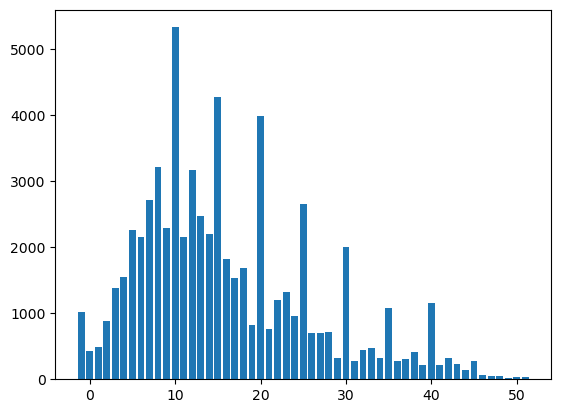

In [16]:
unique = years_count['unique_values']
count_years = years_count['counts']
plt.bar(unique, count_years)
plt.show()

##### "Rounding" errors in surveys
In the graph above we  see a marked increase at every fifth value, it has been noted that survey respondents have a tendency to pick values at intervals of 1 at the extremes (i.e., 1, 2, 3 and 98, 99, 100) and at fifth intervals elsewhere (i.e., 5, 10, …, 90, 95), and with more responses at 50 than at adjacent round values (40, 45, 55, 60) (Manski and Molinari, 2010). I will model this data as is as that’s my understanding of this assignment but for real world applications this data would have to be adjusted to account for this.


Create synthetic data using random.choices and plot it against the original data. https://www.w3schools.com/python/ref_random_choices.asp
I will use the frequency of each number in the data as the weighting

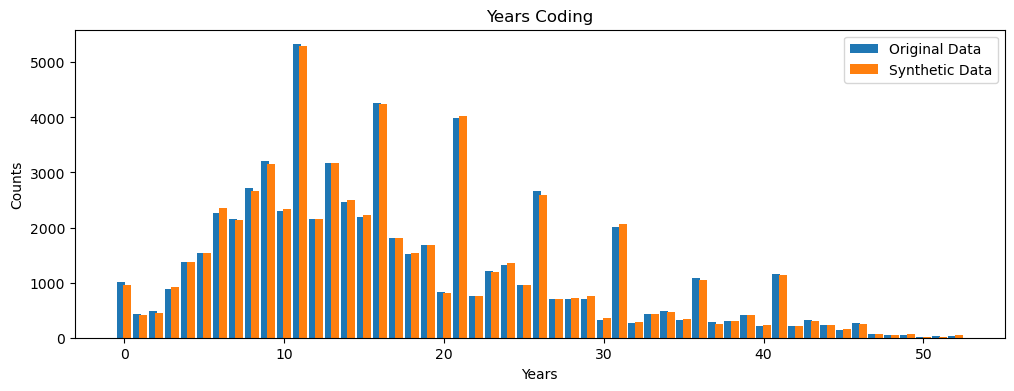

In [17]:
weighting = years_count['counts'].tolist() 

years_list = []
for i in range(-1,52):
        years_list.append(i)

y_count_list = random.choices(years_list, weights=(weighting), k=65505)

test_df['test3'] = pd.Series(y_count_list)
synt_count_years = test_df['test3'].value_counts()
synt_count_years = test_df['test3'].value_counts().rename_axis('unique_values').reset_index(name='counts')
synt_count_years= synt_count_years.sort_values(by=['unique_values'])
synt_count_years= synt_count_years['counts']

plt.figure(figsize=(12, 4))
X = weighting
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, count_years, 0.5, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_years, 0.5, label = 'Synthetic Data') 
 
plt.xlabel('Years') 
plt.ylabel('Counts') 
plt.title('Years Coding') 
plt.legend() 
plt.show() 


Add years coding column to synt_df and convert the numbers back to strings and replace -1.0, 0.0 and 51.0 with NA, Less than 1 year and More than 50.

In [18]:
weighting = years_count['counts'].tolist() 

import random
years_list = []
for i in range(-1,52):
        years_list.append(i)

y_list = random.choices(years_list, weights=(weighting), k=10000)

synt_df['YearsCode'] = pd.Series(y_list)

synt_df['YearsCode'] = synt_df['YearsCode'].apply(str)

# Using regular expressions as the method used for the python columns
# overwrites the entries if they contain the numbers we want to replace.
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^-1*$', 'NA', regex=True)
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^0*$', 'Less than 1 year', regex=True)
synt_df['YearsCode'] = synt_df['YearsCode'].replace(r'^51*$', 'More than 50', regex=True)

##### Ed Level Column
Examine and synthesise data for the Education Level column

In [19]:
ed_count = new_df['EdLevel'].value_counts()
print(ed_count)


Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          28930
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       19005
Some college/university study without earning a degree                                 7713
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3524
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2479
Associate degree (A.A., A.S., etc.)                                                    2038
Something else                                                                          761
Primary/elementary school                                                               363
Name: EdLevel, dtype: int64


Create syntethic data

In [20]:
ed_list = []
for i in range(1,9):
        ed_list.append(i)

synt_ed_list = random.choices(ed_list, weights=(28930, 19005, 7713, 3524, 2479, 2038, 761, 363), k=65505)



Plot both sets of data

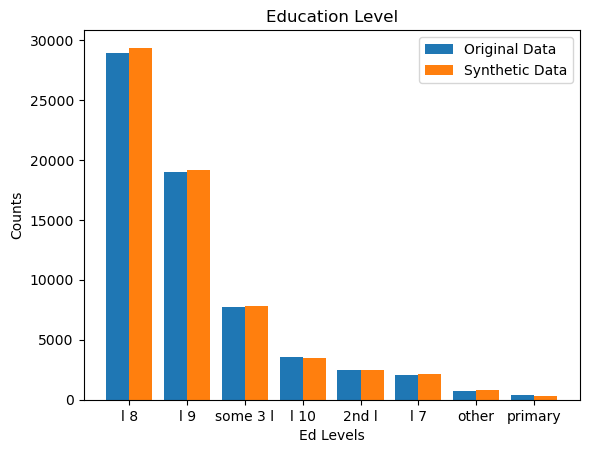

In [21]:
test_df['test4'] = pd.Series(synt_ed_list)
synt_count_ed = test_df['test4'].value_counts()

X = ['l 8', 'l 9', 'some 3 l', 'l 10' , '2nd l', 'l 7', 'other', 'primary'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, ed_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_ed, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('Ed Levels') 
plt.ylabel('Counts') 
plt.title('Education Level') 
plt.legend() 
plt.show() 


Add Ed level column to synt_df and replace the numbers with the proper education levels

In [22]:
ed_list = []
for i in range(1,9):
        ed_list.append(i)

synt_ed_list = random.choices(ed_list, weights=(28930, 19005, 7713, 3524, 2479, 2038, 761, 363), k=10000)

synt_df['EdLevel'] = pd.Series(synt_ed_list)

synt_df['EdLevel'] = synt_df['EdLevel'].apply(str)

synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^1*$', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^2*$', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^3*$', 'Some college/university study without earning a degree', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^4*$', 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^5*$', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^6*$', 'Associate degree (A.A., A.S., etc.)', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^7*$', 'Something else', regex=True)
synt_df['EdLevel'] = synt_df['EdLevel'].replace(r'^8*$', 'Primary/elementary school', regex=True)

##### Main Branch 
This column looks at levels of involvment in coding.

In [23]:
dev_count = new_df['MainBranch'].value_counts()
print(dev_count)

I am a developer by profession                                                           55088
I am not primarily a developer, but I write code sometimes as part of my work/studies     5943
I used to be a developer by profession, but no longer am                                  1571
I am learning to code                                                                     1285
I code primarily as a hobby                                                                926
None of these                                                                              692
Name: MainBranch, dtype: int64


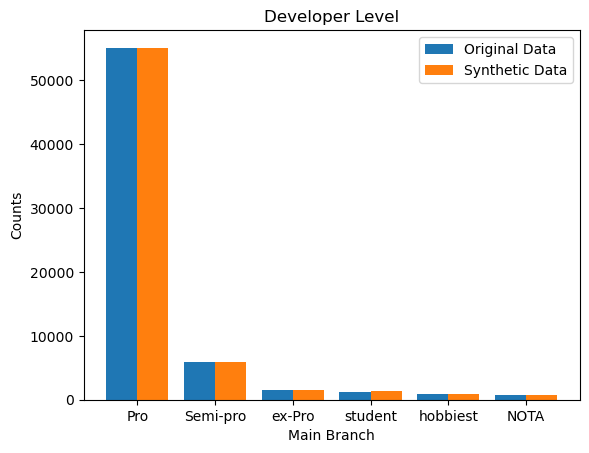

In [24]:
dev_list = []
for i in range(1,7):
       dev_list.append(i)

mb_list = random.choices(dev_list, weights=(55088, 5943, 1571, 1285, 926, 692), k=65505)

test_df['test5'] = pd.Series(mb_list)
synt_count_dev = test_df['test5'].value_counts()

X = ['Pro', 'Semi-pro', 'ex-Pro', 'student' , 'hobbiest', 'NOTA'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, dev_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_dev, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('Main Branch') 
plt.ylabel('Counts') 
plt.title('Developer Level') 
plt.legend() 
plt.show() 

In [25]:
mb_list = random.choices(dev_list, weights=(55088, 5943, 1571, 1285, 926, 692), k=10000)

synt_df['MainBranch'] = pd.Series(mb_list)

synt_df['MainBranch'] = synt_df['MainBranch'].apply(str)

synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^1*$', 'I am a developer by profession', regex=True)
synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^2*$', 'I am not primarily a developer, but I write code sometimes as part of my work/studies', regex=True)
synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^3*$', 'I used to be a developer by profession, but no longer am', regex=True)
synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^4*$', 'I am learning to code', regex=True)
synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^5*$', 'I code primarily as a hobby', regex=True)
synt_df['MainBranch'] = synt_df['MainBranch'].replace(r'^6*$', 'None of these', regex=True)

##### Remote Work Column
We will follow the same procedures as the previous columns to investigate and synthesise data for this column

In [26]:
remote_count = new_df['RemoteWork'].value_counts()
print(remote_count)

Remote                                  26362
Hybrid (some remote, some in-person)    26223
In-person                                8966
Name: RemoteWork, dtype: int64


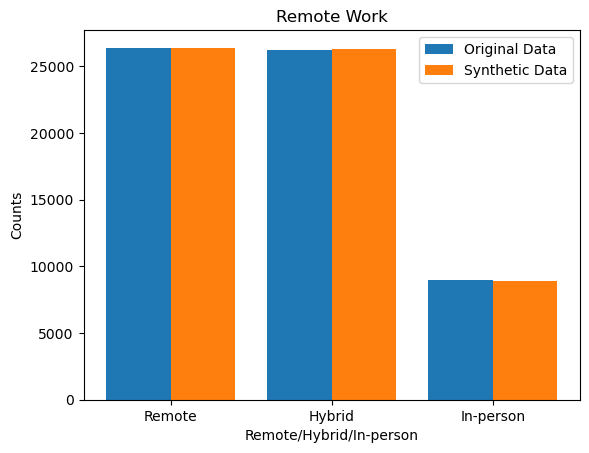

In [27]:
rem_count = []
for i in range(1,4):
       rem_count.append(i)

syn_rem_list = random.choices(remote_count, weights=(26362, 26223, 8966,), k=61551)

test_df['test6'] = pd.Series(syn_rem_list)
synt_count_rem = test_df['test6'].value_counts()

X = ['Remote', 'Hybrid', 'In-person'] 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, remote_count, 0.4, label = 'Original Data') 
plt.bar(X_axis + 0.2, synt_count_rem, 0.4, label = 'Synthetic Data') 
  
plt.xticks(X_axis, X) 
plt.xlabel('Remote/Hybrid/In-person') 
plt.ylabel('Counts') 
plt.title('Remote Work') 
plt.legend() 
plt.show() 


In [28]:
rem_count = []
for i in range(1,4):
       rem_count.append(i)
syn_rem_list = random.choices(rem_count, weights=(26362, 26223, 8966,), k=10000)

synt_df['RemoteWork'] = pd.Series(syn_rem_list)
synt_df['RemoteWork'] = synt_df['RemoteWork'].apply(str)
synt_df['RemoteWork'] = synt_df['RemoteWork'].replace(r'^1*$', 'Remote ', regex=True)
synt_df['RemoteWork'] = synt_df['RemoteWork'].replace(r'^2*$', 'Hybrid', regex=True)
synt_df['RemoteWork'] = synt_df['RemoteWork'].replace(r'^3*$', 'In-person', regex=True)


In [29]:
synt_df.head(10)

,worked_with_python,want_to_python,YearsCode,EdLevel,MainBranch,RemoteWork
0,Y,Y,10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Hybrid
1,Y,Y,10,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I am a developer by profession,Hybrid
2,Y,Y,12,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",I am a developer by profession,Remote
3,N,Y,25,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Remote
4,Y,Y,21,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Remote
5,Y,N,15,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None of these,Hybrid
6,Y,Y,8,Some college/university study without earning ...,I am a developer by profession,Remote
7,N,Y,7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Hybrid
8,Y,Y,1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Remote
9,N,N,9,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",I am a developer by profession,Hybrid


## Conclusion
I had a lot of difficulty finding suitable a suitable dataset for this assignment, most I was interested in either didn’t meet the criteria of having at least one-hundred data points across at least four different variables or were spread across different datasets which would have been difficult to amalgamate.

The Stack Overflow dataset I finally used was also probably not the best pick for this project due to the nature of the data. This dataset results from a survey where most of the answers are chosen from drop down menus which results in most of the data being discrete data. This means I couldn’t easily use for example any of the Numpy distributions random generators to replicate the data.
I was also a little overwhelmed by the amount of data in the dataset and I’m not sure I ended up picking the correct material to investigate.

I did feel that synthesising the data gave me a greater understanding of the data itself and the relationships between the values and also how people respond to surveys for example the way they rounded to the nearest five years for the years coding data.

I also would like to do more analysis of this dataset and I would  also be interested in comparing results from this survey and ones from other years.

Overall I enjoyed the challenges in this survey and am looking forward to doing more projects like this.

## References
Barua, A., Thomas, S.W. and Hassan, A.E. (2014) ‘What are developers talking about? An analysis of topics and trends in Stack Overflow’.

Beeharry, Y. and Ganoo, M. (2018) ‘Analysis of data from the survey with developers on Stack Overflow: A Case Study’, Journal of Engineering Technology, 7(2).

Manski, C.F. and Molinari, F. (2010) ‘Rounding Probabilistic Expectations in Surveys’, Journal of business & economic statistics : a publication of the American Statistical Association, 28(2), pp. 219–231. Available at: https://doi.org/10.1198/jbes.2009.08098.